<h1 style="text-align: center;">IMDB Movie Analysis</h1>

<hr style="border:2px solid blue">

## Introducción

¡Bienvenidos al fascinante mundo del análisis de datos cinematográficos! En este proyecto, nos embarcaremos en un viaje a través del vasto y dinámico universo de Hollywood utilizando un impresionante dataset de [IMDB](https://www.imdb.com/). Este conjunto de datos, disponible en [Kaggle](https://www.kaggle.com/datasets/programmerrdai/imdb-movie-dataset/data), nos proporcionará una rica fuente de información sobre películas, permitiéndonos descubrir tendencias y patrones intrigantes en la industria del cine.

Nuestro objetivo es desentrañar las historias ocultas detrás de las cifras: ¿Qué géneros están dominando la taquilla? ¿Cómo han evolucionado las preferencias del público a lo largo del tiempo? Utilizaremos la potente plataforma de bases de datos MongoDB junto con el driver de Python, Pymongo, para bucear en estos datos y extraer insights valiosos que nos ayuden a entender mejor el panorama cinematográfico actual.

Prepárate para explorar, analizar y sorprenderte con los descubrimientos que haremos en este emocionante proyecto de análisis de datos. ¡Luces, cámara, acción!

---

## IMDB Movie Dataset

En nuestro análisis de las películas de Hollywood, nos sumergiremos en los datos para descubrir las tendencias más interesantes de la industria cinematográfica. Analizaremos cuáles han sido las películas mejor calificadas en los últimos años, exploraremos la posible correlación entre la duración de las películas y su popularidad, y desentrañaremos cuáles han sido las más exitosas en taquilla en relación con su presupuesto de producción y mucho más.

Trabajaremos con un rico *dataset* de IMDB, el cual está organizado en 7 carpetas, cada una conteniendo archivos en formato `.csv` y `.json`. Nos enfocaremos exclusivamente en los archivos `.csv` debido a su estructura, que facilita la iteración sobre cada fila e inserción como documentos independientes en MongoDB.

De este dataset, utilizaremos dos archivos clave: 'FAQScraper' y 'MoviesBasicDetailsScraper'. Estos archivos contienen todos los datos relevantes para nuestro análisis, incluyendo título, año, duración, género, presupuesto, calificación y otros aspectos esenciales.

### Detalle de archivos utilizados

'**FAQScraper**' contiene los campos:
- `movieID`: Id único por película
- `faqTitle`: Subcontiene preguntas relacionadas a la película como:
    - '¿Qué tan larga es...?'
    - '¿Quién dirigió...?'
    - '¿Cuál fue el presupuesto de...?'
    - '¿Cuál es el género de...?'
- `faqContent`: Respuestas a las preguntas generadas en faqTitle. 

'**MoviesBasicDetailsScraper**' contiene los campos:
- `movieID`: Id único por película
- `movieImg`: URL para desplegar el poster de la película
- `movieMoreUrl`: URL para encontrar más información sobre la película en IMDB 
- `movieTitle`: Título de la película
- `movieYear`: Año de estreno
- `movieTime`: Duración
- `movieAvgRating`: Calificación promedio en IMDB
- `movieRatingCount`: Conteo de usuarios que calificaron la película

Con estos datos, estaremos bien equipados para realizar un análisis profundo y revelador sobre las películas de Hollywood, brindando insights valiosos y sorprendentes sobre el panorama cinematográfico actual.

---

## Conexión y *Data Loading*

### 1. Conexión a MongoDB

Primero, nos conectamos al servidor de MongoDB a través del módulo, Pymongo, de Pyhton:

In [1]:
# Importación de función 'MongoClient' de la librería pymongo
from pymongo import MongoClient

In [3]:
# Cliente
client = MongoClient()

# Confirmación de conexión
try:
    client.admin.command('ping')
    print("¡Ping! ¡Te has conectado exitosamente a MongoDB!")
except Exception as e:
    print(e)

¡Ping! ¡Te has conectado exitosamente a MongoDB!


In [4]:
# Visualización la lista de bases de datos que tenemos en MongoDB.
dbs = client.list_database_names()
dbs

['admin',
 'clases',
 'config',
 'jeopardy',
 'local',
 'production',
 'test',
 'tutorial']

### 2. *Data Load*

Ahora, crearemos una nueva base de datos, nuevas colecciones e insertaremos los documentos de los archivos `.csv`:

In [5]:
import os
import csv

# Base de datos 'movies'
movies = client.movies 

# Colecciones
faq_data = movies.faq_data
movie_basic_data = movies.movie_basic_data

# Directorio donde se encuentran los archivos CSV
data_dir = 'imdb_movie_data' # Nombre de la carpeta con los archivos

# Función para leer y cargar los archivos CSV
def load_csv_files(directory):
    for filename in os.listdir(directory):
        if filename.endswith('.csv'):
            with open(os.path.join(directory, filename), 'r', encoding='utf-8') as file:
                reader = csv.DictReader(file)
                for row in reader:
                    yield row

# Inserción documentos CSV en la colección faq_data
faq_documents = list(load_csv_files(os.path.join(data_dir, 'FAQScraper')))
faq_data.insert_many(faq_documents)

# Inserción de documentos CSV en la colección movie_basic_data
movie_basic_documents = list(load_csv_files(os.path.join(data_dir, 'MoviesBasicDetailsScraper')))
movie_basic_data.insert_many(movie_basic_documents)

print("Documentos insertados correctamente.")

Documentos insertados correctamente.


In [6]:
# Nueva base de datos para ver las colecciones que contiene
movies = client.movies
movie_collections = movies.list_collection_names()
movie_collections

['faq_data', 'movie_basic_data']

---

## Exploración de datos

Para comprender mejor los datos que tenemos en ambas colecciones, haremos un conteo de los documentos e imprimiremos una muestra de cada colección para analizar su estructura.

In [7]:
# Función PrettyPrinter para obtener una mejor visualización de los documentos
from pprint import PrettyPrinter

### Colección 'faq_data'

In [8]:
# Conteo documentos 'faq_data'
faq_total_documents = faq_data.count_documents({})
faq_total_documents

1604

In [9]:
# Muestra de documentos
printer = PrettyPrinter()

sample_documents = faq_data.find().limit(5)
for document in sample_documents:
    printer.pprint(document)

{'_id': ObjectId('66867ba65fd8266dc31ea851'),
 'faqContent': '1 hour and 49 minutes',
 'faqTitle': 'How long is Civil War?',
 'faqUrl': '',
 'movieID': 'Q2l2aWwgV2Fy'}
{'_id': ObjectId('66867ba65fd8266dc31ea852'),
 'faqContent': 'April 12, 2024',
 'faqTitle': 'When was Civil War released?',
 'faqUrl': '',
 'movieID': 'Q2l2aWwgV2Fy'}
{'_id': ObjectId('66867ba65fd8266dc31ea853'),
 'faqContent': '7.4 out of 10',
 'faqTitle': 'What is the IMDb rating of Civil War?',
 'faqUrl': '',
 'movieID': 'Q2l2aWwgV2Fy'}
{'_id': ObjectId('66867ba65fd8266dc31ea854'),
 'faqContent': 'Kirsten Dunst, Wagner Moura, and Cailee Spaeny',
 'faqTitle': 'Who stars in Civil War?',
 'faqUrl': '/name/nm0000379/?ref_=ttfaq',
 'movieID': 'Q2l2aWwgV2Fy'}
{'_id': ObjectId('66867ba65fd8266dc31ea855'),
 'faqContent': 'Alex Garland',
 'faqTitle': 'Who wrote Civil War?',
 'faqUrl': '/name/nm0307497/?ref_=ttfaq',
 'movieID': 'Q2l2aWwgV2Fy'}


### Colección 'movie_basic_data'

In [10]:
# Conteo documentos 'movie_basic_data'
movie_total_documents = movie_basic_data.count_documents({})
movie_total_documents

100

In [11]:
sample_documents = movie_basic_data.find().limit(5)
for document in sample_documents:
    printer.pprint(document)

{'_id': ObjectId('66867ba75fd8266dc31eae95'),
 'movieAvgRating': '7.6',
 'movieID': 'Q2l2aWwgV2Fy',
 'movieImg': 'https://m.media-amazon.com/images/M/MV5BYTYyODhlODktYjUzNC00NjUyLWI1MzYtNmI0MTY3YTUxYjY2XkEyXkFqcGdeQXVyMTkxNjUyNQ@@._V1_QL75_UX140_CR0,0,140,207_.jpg',
 'movieMoreUrl': '/title/tt17279496/?ref_=chtmvm_t_1',
 'movieRatingCount': '49K',
 'movieTime': '1h 49m',
 'movieTitle': 'Civil War',
 'movieYear': '2024'}
{'_id': ObjectId('66867ba75fd8266dc31eae96'),
 'movieAvgRating': '7.8',
 'movieID': 'Q2hhbGxlbmdlcnM=',
 'movieImg': 'https://m.media-amazon.com/images/M/MV5BNTk1MTdmYzctNzlkOS00ZTNmLWI4ZTMtMzc3OWFkMDI0MTJkXkEyXkFqcGdeQXVyMTkxNjUyNQ@@._V1_QL75_UX140_CR0,0,140,207_.jpg',
 'movieMoreUrl': '/title/tt16426418/?ref_=chtmvm_t_2',
 'movieRatingCount': '11K',
 'movieTime': '2h 11m',
 'movieTitle': 'Challengers',
 'movieYear': '2024'}
{'_id': ObjectId('66867ba75fd8266dc31eae97'),
 'movieAvgRating': '5.2',
 'movieID': 'UmViZWwgTW9vbiAtIFBhcnQgVHdvOiBUaGUgU2NhcmdpdmVy',
 'movieImg

### Reestructuración

Tras analizar el número de documentos y su estructura, encontramos que la estructura actual de la colección '**faq_data**' puede no ser la más eficiente para nuestro análisis, pues cada pregunta y su respectiva respuesta se almacenan como un documento separado. Una alternativa sería reestructurar los documentos para que cada película tenga un solo documento que contenga todas las preguntas y respuestas relacionadas.

Podemos combinar todas las preguntas y respuestas para cada película en un solo documento usando el campo `movieID` como clave de la siguiente manera:

In [12]:
# Nueva colección para almacenar los documentos reestructurados
movie_faq_data = movies.movie_faq_data

# Diccionario para almacenar las preguntas y respuestas por película
movie_faq_dict = {}

# Iteramos sobre los documentos en la colección original
for document in faq_data.find():
    movie_id = document['movieID']
    faq_title = document['faqTitle']
    faq_content = document['faqContent']
    
    # Verificamos si ya existe un documento para esta película en el diccionario
    if movie_id in movie_faq_dict:
        movie_faq_dict[movie_id]['faqs'][faq_title] = faq_content
    else:
        movie_faq_dict[movie_id] = {'_id': movie_id, 'faqs': {faq_title: faq_content}}

# Insertamos los documentos reestructurados en la nueva colección
movie_faq_data.insert_many(movie_faq_dict.values())

# Eliminamos la colección original
movies.drop_collection('faq_data')

print("Datos reestructurados y migrados correctamente.")

Datos reestructurados y migrados correctamente.


### Colección 'movie_faq_data'

Ahora exploraremos nuevamente la nueva colección con los documentos reestructurados.

In [13]:
sample_documents = movie_faq_data.find().limit(2)
for document in sample_documents:
    printer.pprint(document)

{'_id': 'Q2l2aWwgV2Fy',
 'faqs': {'': '',
          'How long is Civil War?': '1 hour and 49 minutes',
          'How much did Civil War earn at the US box office?': '$49.2 million',
          'What genre is Civil War?': 'Action',
          'What is Civil War rated?': 'R',
          'What is the IMDb rating of Civil War?': '7.4 out of 10',
          'What is the plot of Civil War?': 'A journey across a dystopian '
                                            'future America, following a team '
                                            'of military-embedded journalists '
                                            'as they race against time to '
                                            'reach DC before rebel factions '
                                            'descend upon the White House.',
          'What was the budget for Civil War?': '$50 million',
          'When was Civil War released?': 'April 12, 2024',
          'Who directed Civil War?': 'Alex Garland',
          'Who 

## Depuración de datos

Al reestructurar los documentos, como nos propusimos, nos damos cuenta que no es necesario tener absolutamente todas las preguntas que vienen incluídas, sino, solamente, las correspondientes al género, presupuesto, calificación y desempeño en taquilla de cada película. Realizaremos un paso adicional donde, en una tercera colección, reflejemos solamente los campos que necesitamos:

In [14]:
movie_faq_data = movies.movie_faq_data

# Nueva colección para almacenar los documentos reestructurados
new_movie_faq_data = movies.new_movie_faq_data

# Iteramos sobre los documentos en la colección original
for document in movie_faq_data.find():
    movie_id = document['_id']
    faq_dict = document['faqs']
    
    # Creamos un nuevo diccionario para almacenar las preguntas reformuladas
    new_faq_dict = {}
    
    # Iteramos sobre las preguntas originales
    for question, answer in faq_dict.items():
        # Reformulamos las preguntas y cambiamos los nombres de las claves
        if question.startswith("What genre is"):
            new_faq_dict['genre'] = answer
        elif question.startswith("What is"):
            if "rated" in question:
                new_faq_dict['rating'] = answer
        elif question.startswith("How much"):
            if "earn at the US box office" in question:
                if "million" in answer:
                    # Convertimos los valores a float
                    new_faq_dict['usBoxOffice'] = float(answer.replace('$', '').replace(' million', '').replace(',',''))*10**6 # Millones
                else:
                    new_faq_dict['usBoxOffice'] = float(answer.replace('$', '').replace(',','')) # Miles
        elif question.startswith("What was"):
            if "budget" in question:
                if "million" in answer:
                    # Convertimos los valores a float 
                    new_faq_dict['budget'] = float(answer.replace('$', '').replace(' million', '').replace(',', ''))*10**6 # Millones
                else:
                    new_faq_dict['budget'] = float(answer.replace('$', '').replace(',', '')) # Miles

    
    # Verificamos si la pregunta de "US box office" está presente y establecemos su valor en "0" si falta
    if 'usBoxOffice' not in new_faq_dict:
        new_faq_dict['usBoxOffice'] = 0
    
    # Insertamos los documentos reestructurados en la nueva colección
    new_movie_faq_data.insert_one({'_id': movie_id, 'faqs': new_faq_dict})

print("Datos reestructurados y migrados correctamente.")

Datos reestructurados y migrados correctamente.


Por último, en orden para obtener consultas más simples y directas, podemos crear una estructura adicional donde se aniden los documentos relacionados a género, presupuesto, taquilla y calificación a los de la colección 'movie_basic_data'. Así, se contendrá toda la información relacionada con una película, incluídos estos campos y sus respuestas, en una sola colección.

Iteraremos sobre cada documento de la nueva colección 'new_movie_faq_data', recuperando las claves y valores anidadas para cada película para actualizar los documentos correspondientes en la colección 'movie_basic_data'.

In [15]:
# Iteramos sobre los documentos en la colección movie_faq_data
for document in new_movie_faq_data.find():
    movie_id = document['_id']
    faqs = document['faqs']
    
    # Actualizamos el documento correspondiente en la colección movie_basic_data
    movie_basic_data.update_one({
        'movieID': movie_id
    },
        {'$set': {
            'faq': faqs
        }}
    )

print("Datos migrados correctamente.")

Datos migrados correctamente.


In [16]:
# Muestra de documento reestructurado en 'movie_basic_data'
printer = PrettyPrinter()

sample_documents = movie_basic_data.find().limit(1)
for document in sample_documents:
    printer.pprint(document)

print()
# Conteo documentos 'movie_basic_data'
movie_total_documents = movie_basic_data.count_documents({})
print(f'Total de documentos en la colección "movie_basic_data": {movie_total_documents}')

{'_id': ObjectId('66867ba75fd8266dc31eae95'),
 'faq': {'budget': 50000000.0,
         'genre': 'Action',
         'rating': 'R',
         'usBoxOffice': 49200000.0},
 'movieAvgRating': '7.6',
 'movieID': 'Q2l2aWwgV2Fy',
 'movieImg': 'https://m.media-amazon.com/images/M/MV5BYTYyODhlODktYjUzNC00NjUyLWI1MzYtNmI0MTY3YTUxYjY2XkEyXkFqcGdeQXVyMTkxNjUyNQ@@._V1_QL75_UX140_CR0,0,140,207_.jpg',
 'movieMoreUrl': '/title/tt17279496/?ref_=chtmvm_t_1',
 'movieRatingCount': '49K',
 'movieTime': '1h 49m',
 'movieTitle': 'Civil War',
 'movieYear': '2024'}

Total de documentos en la colección "movie_basic_data": 100


Ahora que hemos reestructurado y anidado los documentos en una sola colección, estamos listos para comenzar nuestro análisis.

---

## Datos y estadísticas descriptivas

### Cantidad de películas por año

Comenzaremos por obtener una comprensión de nuestros datos, calculando la cantidad de películas que tenemos por año. Para esto, ejecutaremos un *pipeline* de agregación en MongoDB:

In [17]:
movie_basic_data = movies.movie_basic_data

# Pipeline de agregación para agrupar por año de estreno y contar películas por año
pipeline = [
    {"$group": {
        "_id": "$movieYear", 
        "count": {
            "$sum": 1
        }
    }},
    {"$sort": {
        "_id": 1
    }}
]

# Ejecución del pipeline de agregación
result = movie_basic_data.aggregate(pipeline)

# Imprimimos el resultado
print("Cantidad de películas por año:")
for doc in result:
    print(f"Año: {doc['_id']}, Cantidad de películas: {doc['count']}")

Cantidad de películas por año:
Año: 1972, Cantidad de películas: 1
Año: 1979, Cantidad de películas: 2
Año: 1984, Cantidad de películas: 1
Año: 1989, Cantidad de películas: 2
Año: 1993, Cantidad de películas: 1
Año: 1994, Cantidad de películas: 2
Año: 1997, Cantidad de películas: 1
Año: 1999, Cantidad de películas: 1
Año: 2005, Cantidad de películas: 1
Año: 2014, Cantidad de películas: 1
Año: 2015, Cantidad de películas: 2
Año: 2016, Cantidad de películas: 2
Año: 2017, Cantidad de películas: 1
Año: 2019, Cantidad de películas: 4
Año: 2021, Cantidad de películas: 1
Año: 2022, Cantidad de películas: 4
Año: 2023, Cantidad de películas: 25
Año: 2024, Cantidad de películas: 48


La distribución de películas en nuestro Dataset tiene una variación considerable por año. La mayor cantidad se encuentra entre el año 2024 y 2023, mientras que en el resto de años se registra un rango de entre 1 a 4 películas. Asimismo, aunque hay un rango que comprende del año 1972 al 2024, hay algunos años que se omiten de por medio. Será importante considerar esto en nuestro análisis, pues es limitante si llegamos a desear comparar datos entre diferentes años.

---

### Frecuencia y promedio de duración

Pasamos, ahora, a estudiar la frecuencia de duración de cada película de nuestra colección y conocer cuál es el promedio. Para esto, haremos uso de la librería **Matplotlib** de Python, que nos ayudará a visualizar la frecuencia de mejor manera. 

Dado que el tipo de dato en el campo `movieTime` es de tipo *string*, haremos uso de una expresión regular para extraer las horas y minutos.

Luego, haremos un *pipeline* de agregación para filtrar y proyectar solamente los documentos válidos. Una vez ejecutado, iteraremos sobre cada documento filtrado para calcular la frecuencia y, consecuentemente, el promedio.

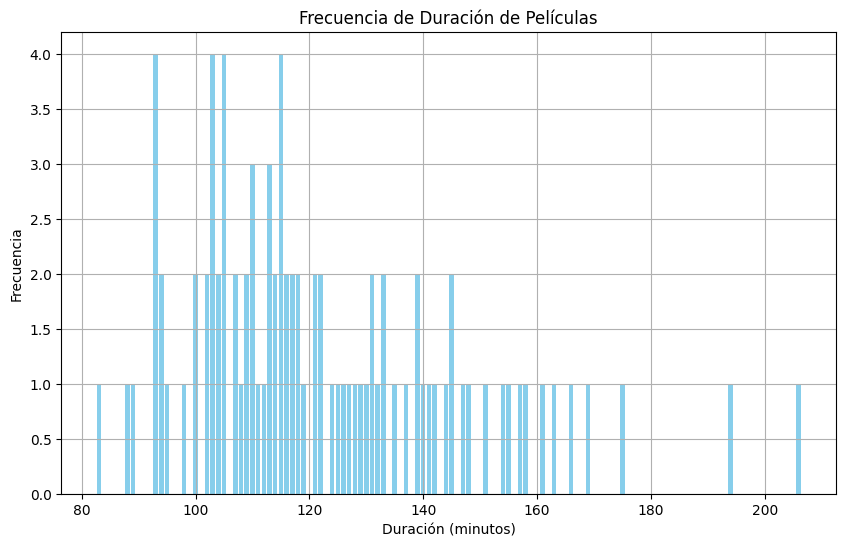

Promedio de duración: 122.46 minutos


In [18]:
import matplotlib.pyplot as plt
import re

# Expresión regular para extraer horas y minutos de 'movieTime'
pattern = re.compile(r'(\d+)h (\d+)m')

# Diccionario para almacenar la frecuencia de la duración de las películas
duration_frequency = {}

# Pipeline de agregación para filtrar y procesar documentos válidos
pipeline = [
    # Filtramos documentos con formato válido
    {"$match": {
        "movieTime": {
            "$regex": r'\d+h \d+m'
        }
    }},
    # Proyectamos solo el campo 'movieTime'
    {"$project": {
        "_id": 0, 
        "movieTime": 1
    }},  
]

# Ejecutamos el pipeline de agregación
result = movie_basic_data.aggregate(pipeline)

# Procesamos cada documento y calculamos la frecuencia de duración de las películas
for doc in result:
    match = pattern.match(doc['movieTime'])
    if match:
        hours = int(match.group(1))
        minutes = int(match.group(2))
        total_minutes = hours * 60 + minutes
        duration_frequency[total_minutes] = duration_frequency.get(total_minutes, 0) + 1

# Convertimos el diccionario en listas de duraciones y frecuencias
durations = list(duration_frequency.keys())
frequencies = list(duration_frequency.values())

# Visualizamos los resultados en un histograma
plt.figure(figsize=(10, 6))
plt.bar(durations, frequencies, color='skyblue')
plt.xlabel('Duración (minutos)')
plt.ylabel('Frecuencia')
plt.title('Frecuencia de Duración de Películas')
plt.grid(True)
plt.show()

# Calculamos el promedio de duración
total_movies = sum(duration_frequency.values())  # Calcular el número total de películas
total_duration = sum(duration * frequency for duration, frequency in duration_frequency.items())  # Calcular la suma total de duraciones
average_duration = total_duration / total_movies  # Calcular el promedio de duración

print(f"Promedio de duración: {average_duration:.2f} minutos")

Hemos hallado que las películas registradas en el conjunto de datos tienen una **duración típica de dos horas con dos minutos**. Este datos nos puedem proporcionar información valiosa en casos donde queramos comparar la duración de alguna película en particular con la del promedio general, observando si se acerca o se aleja de la norma, e identificandola como típica o atípica en su evaluación. 

---

### Distribución de calificaciones promedio

A continuación, visualizaremos la frecuencia con la que aparecen las distintas calificaciones promedio de las películas para estudiar la forma de su distribución.

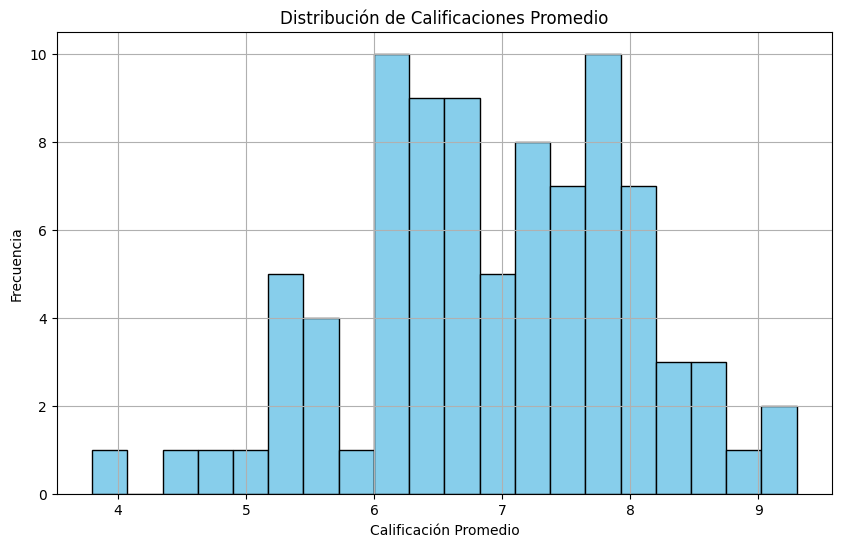

Calificación promedio: 6.93
Mediana de calificación: 7.00
Desviación estándar de calificación: 1.08


In [19]:
import numpy as np

# Pipeline de agregación para extraer las calificaciones promedio
pipeline = [
    # Filtramos documentos con calificaciones válidas
    {"$match": {
        "movieAvgRating": {
            "$regex": r'\d+(\.\d+)?'  # Expresión regular para encontrar números decimales
        }
    }},
    # Convertimos el campo 'movieAvgRating' a tipo numérico
    {"$project": {
        "_id": 0,
        "rating": {"$toDouble": "$movieAvgRating"}
    }}
]

# Ejecutamos el pipeline de agregación
result = movie_basic_data.aggregate(pipeline)

# Extraemos las calificaciones promedio
ratings = [doc['rating'] for doc in result]

# Visualizamos las calificaciones promedio en un histograma
plt.figure(figsize=(10, 6))
plt.hist(ratings, bins=20, color='skyblue', edgecolor='black')
plt.xlabel('Calificación Promedio')
plt.ylabel('Frecuencia')
plt.title('Distribución de Calificaciones Promedio')
plt.grid(True)
plt.show()

# Calculamos estadísticas descriptivas
mean_rating = np.mean(ratings)
median_rating = np.median(ratings)
std_rating = np.std(ratings)

print(f"Calificación promedio: {mean_rating:.2f}")
print(f"Mediana de calificación: {median_rating:.2f}")
print(f"Desviación estándar de calificación: {std_rating:.2f}")

La distribución de las calificaciones promedio en nuestro Dataset no sigue un patrón notable. A pesar de estar sesgada hacia calificaciones 'favorables' (en promedio 6.93), encontramos que tiene múltiples picos, sin dejar clara la recepción de las películas en general. Sin embargo, será interesante hacer un estudio de correlación con alguna otra variable para ver si así identificamos tendencias.

---

## Top 10 de películas mejor calificadas

Utilizaremos la librería de **Pandas** para visualizar de manera más limpia el Top 10 de películas por calificación.

In [20]:
import pandas as pd

# Pipeline de agregación para obtener las películas ordenadas por calificación promedio de mayor a menor
pipeline = [
    {"$match": {
        "movieAvgRating": {
            "$exists": True,
            "$ne": ""
        }
    }},
    {"$project": {
        "_id": 0,
        "movieTitle": 1,
        "movieAvgRating": 1,
        "movieYear": 1
    }},
    {"$sort": {
        "movieAvgRating": -1
    }},
    {"$limit": 10} # Top 10
]

# Ejecutamos el pipeline de agregación
result = list(movie_basic_data.aggregate(pipeline))

# DataFrame de Pandas con los resultados
df_top_10_ratings = pd.DataFrame(result)

df_top_10_ratings

,movieTitle,movieYear,movieAvgRating
0,The Shawshank Redemption,1994,9.3
1,The Godfather,1972,9.2
2,Pulp Fiction,1994,8.9
3,Dune: Part Two,2024,8.7
4,Interstellar,2014,8.7
5,Alien,1979,8.5
6,Apocalypse Now,1979,8.4
7,Oppenheimer,2023,8.3
8,Top Gun: Maverick,2022,8.2
9,Article 370,2024,8.1


Explorar el Top 10 de películas mejor calificadas nos lleva en un viaje interesante a través del tiempo cinematográfico. Resulta intrigante notar que películas icónicas como '*Shawshank Redemption*' (1994) y '*The Godfather*' (1972) siguen reinando en la cima, incluso frente a producciones más recientes. Estos clásicos atemporales continúan cautivando al público con sus narrativas cautivadoras y actuaciones memorables, demostrando que la excelencia cinematográfica no conoce límites temporales. Este análisis resalta la perdurable relevancia y el impacto duradero que estas obras maestras del cine siguen teniendo en la audiencia, trascendiendo generaciones y manteniendo su lugar privilegiado en el corazón de los amantes del cine.

Tomando en cuenta la distribución de películas que tenemos por año en nuestro Dataset, haremos otro Top 10 de películas que hayan sido estrenadas en el 2023 y 2024. También, tomaremos en cuenta a la cantidad de usuarios que calificaron estas películas y que se refleja en el campo `movieRatingCount`.

In [21]:
# Pipeline para de agregación para obtener películas estrenadas en 2023 y 2024 y calificación promedio descendente
pipeline = [
    {"$match": {
        "movieYear": {
            "$in": ["2023", "2024"]
        }
    }},
    {"$project": {
        "_id": 0,
        "movieTitle": 1,
        "movieAvgRating": 1,
        "movieYear": 1,
        "movieRatingCount": 1
    }},
    {"$sort": {
        "movieAvgRating": -1
    }},
    {"$limit": 10}
]

# Ejecutamos el pipeline de agregación
top_movies_2023_2024 = list(movie_basic_data.aggregate(pipeline))

# Mostramos el resultado en un DataFrame de Pandas
df_top_movies = pd.DataFrame(top_movies_2023_2024)

df_top_movies

,movieTitle,movieYear,movieAvgRating,movieRatingCount
0,Dune: Part Two,2024,8.7,376K
1,Oppenheimer,2023,8.3,728K
2,Article 370,2024,8.1,15K
3,Unsung Hero,2024,8.0,702
4,Amar Singh Chamkila,2024,8.0,9.2K
5,The Holdovers,2023,7.9,138K
6,Perfect Days,2023,7.9,37K
7,Poor Things,2023,7.9,250K
8,Challengers,2024,7.8,11K
9,All of Us Strangers,2023,7.7,44K


Este Top 10 de películas mejor calificadas nos proporciona una visión interesante de las preferencias y opiniones de los espectadores en relación con las películas estrenadas recientemente. 

Por un lado, hay una variación significativa en la cantidad de usuarios que han calificado estas películas. Mientras que algunas tienen cientos de miles de calificaciones, otras tienen cantidades más bajas. Esto puede deberse a una combinación de factores, como la popularidad de la película o su disponibilidad en cines y en plataformas de streaming. Aquí podemos generar una pregunta interesante que estudiaremos más adelante: ¿hay alguna correlación entre cantidad de usuarios que califican estas películas con el desempeño que tuvieron en taquilla? Quizás sea un estudio que ayude a determinar la popularidad de una película. 

También, aunque no se despliegue en el DataFrame, podemos percibir una variedad de géneros y temas entre estas películas. Desde películas de ciencia ficción como '*Dune: Part Two*' (2024), hasta dramas históricos como '*Oppenheimer*' (2023) y películas independientes como '*Perfect Days*(2023)' y '*All of Us Strangers*'(2023), hay una amplia gama de opciones para diferentes gustos y preferencias. Estudiaremos, de igual manera, más adelante, qué géneros son los más populares.

---

## Top 10 de películas con mejor desempeño en taquilla

In [22]:
# Pipeline de agregación para obtener las top 10 películas con mejor desempeño en taquilla
pipeline = [
    # Documentos por el valor de "usBoxOffice" en orden descendente
    {"$sort": {
        "faq.usBoxOffice": -1
    }},
    # Top 10
    {"$limit": 10},
    {"$project": {
        "_id": 0,
        "movieTitle": 1,
        "movieYear": 1,
        "usBoxOffice": "$faq.usBoxOffice"}}
]

# Ejecución del pipeline de agregación
result = movie_basic_data.aggregate(pipeline)

# Convertimos el resultado en un DataFrame de Pandas
df_top_10_box_office = pd.DataFrame(result)

df_top_10_box_office

,movieTitle,movieYear,usBoxOffice
0,Top Gun: Maverick,2022,719000000.0
1,Titanic,1997,674000000.0
2,Barbie,2023,636000000.0
3,Deadpool,2016,363000000.0
4,Oppenheimer,2023,330000000.0
5,Dune: Part Two,2024,278000000.0
6,Wonka,2023,218000000.0
7,Interstellar,2014,188000000.0
8,Kung Fu Panda 4,2024,181000000.0
9,Godzilla x Kong: The New Empire,2024,174000000.0


De manera similar a como vimos en la consulta de 'Top 10 de películas mejor calificadas', encontramos que este Top 10 abarca diferentes años de estreno; desde clásicos como '*Titanic*' (1997) hasta películas recientes como '*Dune: Part Two*' (2024), demostramos que el éxito en taquilla puede ocurrir en diferentes momentos en la historia del cine. 

Cabe añadir, sin embargo, que la mayoría de las películas en este Top 10 las podemos encontrar dentro del rango de años 2014-2024. Esto nos podría sugerir que es en los últimos 10 años que se ha visto una tendencia creciente en el éxito de taquilla. Puede deberse a una combinación de factores, como avances en tecnología cinematográfica, estrategias de *marketing* más efectivas, y una mayor diversificación de géneros y temas que atraen a una audiencia más amplia. 

---

## Relación de calificación y desempeño en taquilla

A continuación, estudiaremos la relación que existe entre la calificación de las películas en nuestro Dataset y su desempeño en taquilla. Quizás, la calificación influye en las ganancias de taquilla y determina la popularidad de la película... 

Debido a que muchas películas estrenadas recientemente, no tienen información respecto a su desempeño en taquilla, solo consideraremos aquellas que tengan un valor distinto a 0.

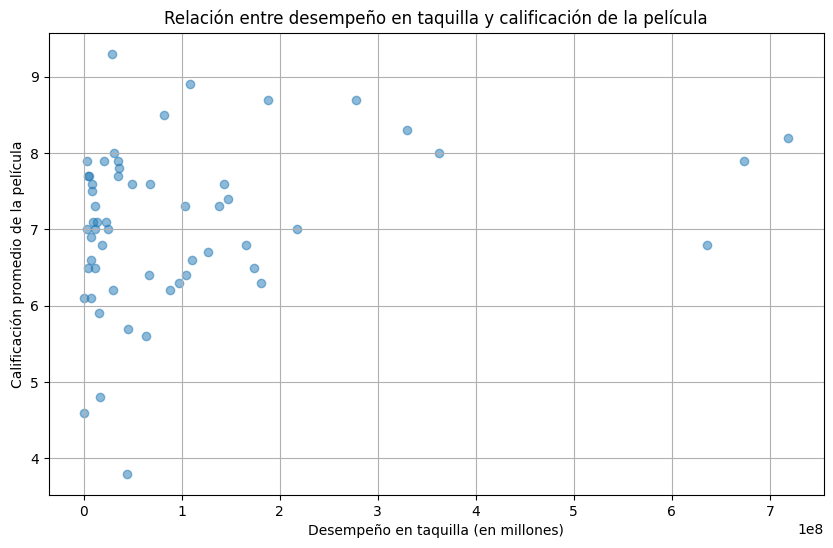

In [23]:
# Pipeline de agregación para filtrar datos de 'movieAvgRating' y 'usBoxOffice'
pipeline = [
    {"$match": {
        "movieAvgRating": {
            "$exists": True,
            "$ne": ""
        },
        "faq.usBoxOffice": {
            "$exists": True,
            "$ne": 0
        }
    }},
    # Convertimos el campo 'movieAvgRating' a tipo numérico
    {"$set": {
        "movieAvgRating": {"$toDouble": "$movieAvgRating"},
    }},
    {"$project": {
        "_id": 0,
        "movieTitle": 1,
        "movieAvgRating": 1,
        "usBoxOffice": "$faq.usBoxOffice"
    }}
]

# Ejecución de pipeline de agregación
result = movie_basic_data.aggregate(pipeline)

# Convertimos el resultado en un DataFrame de Pandas
df_popularidad = pd.DataFrame(result)

# Creamos el gráfico de dispersión
plt.figure(figsize=(10, 6))
plt.scatter(df_popularidad['usBoxOffice'], df_popularidad['movieAvgRating'], alpha=0.5)
plt.xlabel('Desempeño en taquilla (en millones)')
plt.ylabel('Calificación promedio de la película')
plt.title('Relación entre desempeño en taquilla y calificación de la película')
plt.grid(True)
plt.show()

Al observar el gráfico de dispersión donde estudiamos ambas variables, parece que no hay una relación lineal clara entre la calificación promedio y su éxito en taquilla. Algunas películas con altas calificaciones tienen un bajo desempeño en taquilla, mientras que otras películas con calificaciones más bajas tienen un alto desempeño. Esto sugiere que la relación no es tan directa como podría pensarse.

In [26]:
df_popularidad.sort_values(by='usBoxOffice', ascending=False).head(10)

,movieTitle,movieAvgRating,usBoxOffice
51,Top Gun: Maverick,8.2,719000000.0
52,Titanic,7.9,674000000.0
35,Barbie,6.8,636000000.0
49,Deadpool,8.0,363000000.0
14,Oppenheimer,8.3,330000000.0
3,Dune: Part Two,8.7,278000000.0
36,Wonka,7.0,218000000.0
31,Interstellar,8.7,188000000.0
17,Kung Fu Panda 4,6.3,181000000.0
9,Godzilla x Kong: The New Empire,6.5,174000000.0


De los 57 documentos que se han filtrado en nuestro DataFrame, podemos ver que hay películas con altas calificaciones que también tienen altos ingresos en taquilla, como '*Top Gun: Maverick*' (2022) y '*Titanic*' (1997), pero también hay películas con calificaciones bajas que tienen un desempeño en taquilla sorprendentemente alto, como '*Barbie*' (2023) y '*Deadpool*' (2016). 

Por lo tanto, en este conjunto de datos, parece que otros factores, además de la calificación promedio de la película, pueden influir en su éxito en la taquilla. Podrían ser respecto al género, la popularidad del elenco, la estrategia de marketing, la época del año de estreno, entre otros.


---

## Análisis de géneros

### Calificación promedio por género

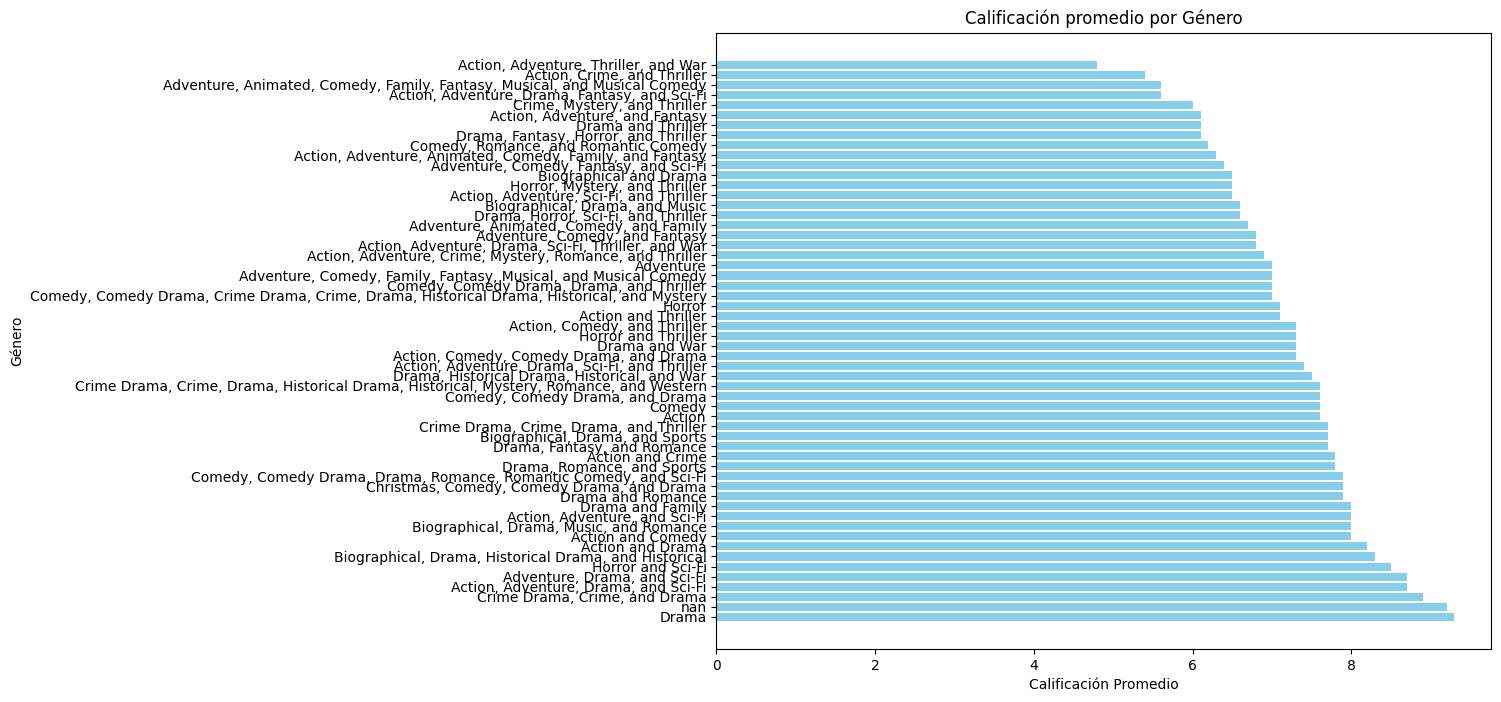

In [27]:
# Pipeline de agregación para filtrar datos de 'movieAvgRating' y 'genre'
pipeline = [
    {"$match": {
        "movieAvgRating": {
            "$exists": True,
            "$ne": ""
        }
    }},
    {"$project": {
        "_id": 0,
        "movieAvgRating": {"$toDouble": "$movieAvgRating"},  # Conversión a tipo de datos numérico
        "genre": "$faq.genre" 
    }}
]

# Ejecución de pipeline de agregación
result = movie_basic_data.aggregate(pipeline)

# Resultado a DataFrame
df_genero_rating = pd.DataFrame(result)

# Columna 'genre' a tipo de datos de cadena
df_genero_rating['genre'] = df_genero_rating['genre'].astype(str)

# Ordenamos el DataFrame por calificación promedio en orden descendente
df_genero_rating = df_genero_rating.sort_values(by='movieAvgRating', ascending=False)

# Gráfico de barras
plt.figure(figsize=(10, 8))
plt.barh(df_genero_rating['genre'], df_genero_rating['movieAvgRating'], color='skyblue')
plt.xlabel('Calificación Promedio')
plt.ylabel('Género')
plt.title('Calificación promedio por Género')
plt.show()

Al analizar detenidamente el gráfico de barras que hemos generado, el cual muestra la relación entre el género de las películas y su calificación promedio, podemos inferir algunas conclusiones interesantes. 

En primer lugar, notamos que el género que obtiene consistentemente las calificaciones más altas es el 'Drama'. Este género parece resonar profundamente con los espectadores, quizás debido a su capacidad para explorar temas humanos universales de una manera emotiva y reflexiva. Además del 'Drama', observamos que otros géneros bien evaluados y que se relacionan con 'Drama' incluyen 'Crimen', 'Aventura', 'Ciencia Ficción' y 'Biográfica e Histórica'. Estos resultados sugieren que el público valora las películas que ofrecen una experiencia cinematográfica rica en narrativa, emoción y profundidad temática.

Por otro lado, identificamos que los géneros con calificaciones más bajas tienden a ser aquellos asociados con la acción, la aventura y el thriller. Estos géneros suelen centrarse en tramas de ritmo rápido, escenas de acción intensas y giros emocionantes, lo que puede dejar menos espacio para el desarrollo de personajes complejos o la exploración de temas profundos. Sin embargo, es importante tener en cuenta que las preferencias de los espectadores pueden variar considerablemente, y lo que constituye una buena película para un espectador puede no serlo necesariamente para otro. En última instancia, el valor de una película radica en su capacidad para resonar con su audiencia objetivo y proporcionar una experiencia memorable y significativa en la pantalla grande.


---

### Éxito en taquilla por género


Contrastemos la información obtenida anteriormente con su desempeño en taquilla y veamos qué géneros atrae más ingresos.

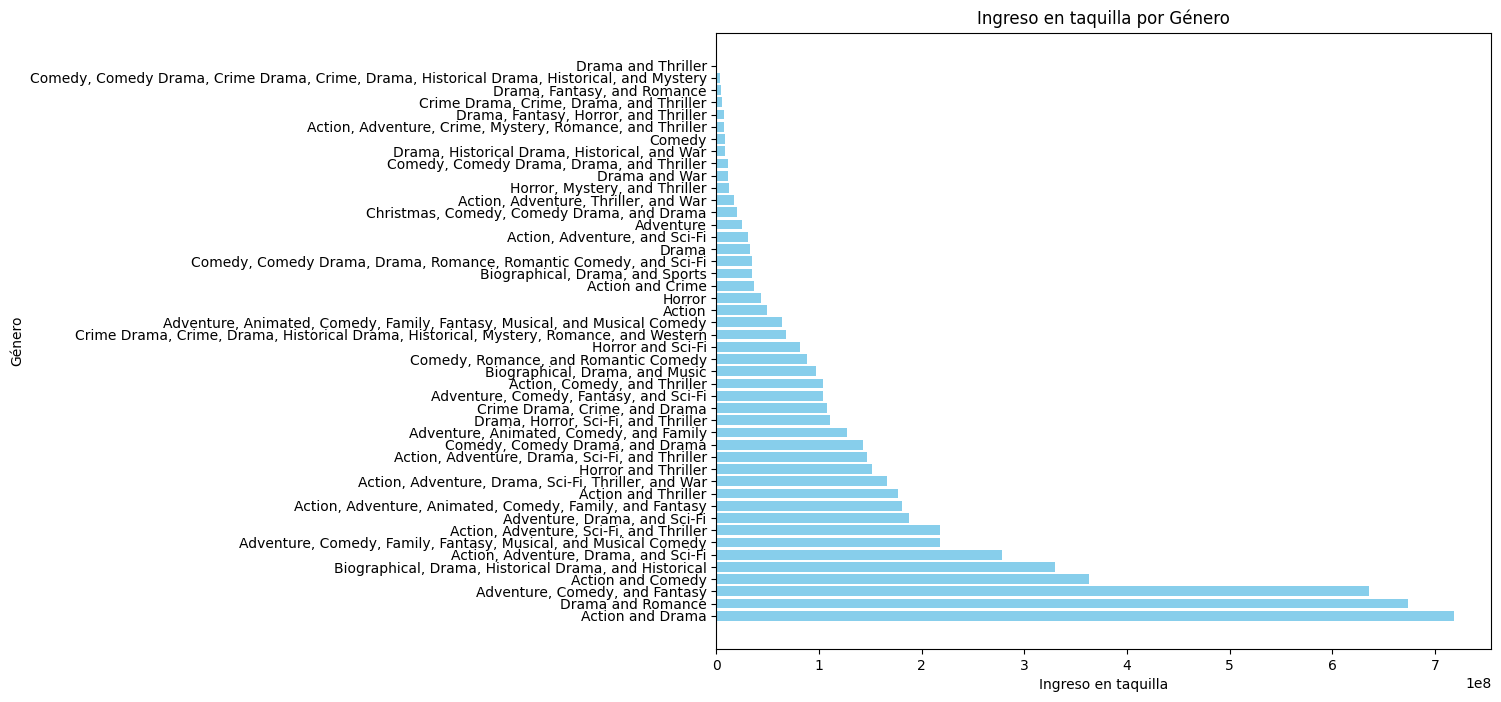

In [28]:
# Pipeline de agregación para filtrar datos de 'usBoxOffice' y 'genre'
pipeline = [
    {"$match": {
        "faq.usBoxOffice": {
            "$exists": True,
            "$ne": 0
        }
    }},
    {"$project": {
        "_id": 0,
        "genre": "$faq.genre",
        "usBoxOffice": "$faq.usBoxOffice" 
    }},
    {"$group": {
        "_id": "$genre",
        "totalBoxOffice": {"$sum": "$usBoxOffice"}
    }}
]

# Ejecución de pipeline de agregación
result = movie_basic_data.aggregate(pipeline)

# Resultado a DataFrame 
df_genero_boxOffice = pd.DataFrame(result)

# Ordenamos el DataFrame por ingreso en taquilla en orden descendente
df_genero_boxOffice = df_genero_boxOffice.sort_values(by='totalBoxOffice', ascending=False)

# Gráfico de barras
plt.figure(figsize=(10, 8))
plt.barh(df_genero_boxOffice['_id'], df_genero_boxOffice['totalBoxOffice'], color='skyblue')
plt.xlabel('Ingreso en taquilla')
plt.ylabel('Género')
plt.title('Ingreso en taquilla por Género')
plt.show()

La dinámica de la taquilla nos presenta una curiosa contradicción: géneros como 'Acción, 'Romance', 'Comedia' y 'Fantasía' encabezan la lista de ingresos, atrayendo a multitudes de espectadores. Sin embargo, al profundizar, observamos que el 'Drama', aunque presente, ve disminuido su impacto cuando se fusiona con elementos 'Históricos' o 'Biográficos'. Esto sugiere que la audiencia muestra un mayor interés en la evasión y entretenimiento que en los temas más reflexivos o históricos. Por otro lado, géneros como 'Horror' y 'Thrillers' parecer tener un atractivo limitado en taquilla, lo que podría indicar una preferencia general por experiencias menos intensas o aterradoras en el cine.

Al comparar estos hallazgos con los obtenidos al relacionar género y calificación, podemos observar una dicotomía en las preferencias del público. Por un lado, géneros como son los de 'Acción', 'Romance' y 'Comedia, que dominan en términos de ingresos en taquilla, no necesariamente reflejan las películas mejor calificadas en términos de calidad cinematográfica. En cambio, géneros como 'Drama', que tiende a recibir altas calificaciones, no necesariamente generan los mayores ingresos en taquilla. Esto indica que el éxito financiero y la calidad artística no siempre van de la mano en la industria cinematográfica, y que la preferencia del público puede estar influenciada por una avriedad de factores más allá de la calidad intrínseca de la película.

---

## Desempeño en taquilla por duración

Será interesante observar cómo influye la duración de una película en los ingresos que obtiene en taquilla. Podríamos suponer, previamente, que mientras más larga es una película, menos público atrae al cine y, por lo tanto, menos dinero recaudará en taquilla. Veamos si se comprueba...

Para este estudio consideraremos solamente las películas que tienen fecha de estreno en 2023 y 2024, para tener una muestra de tamaño considerable. 

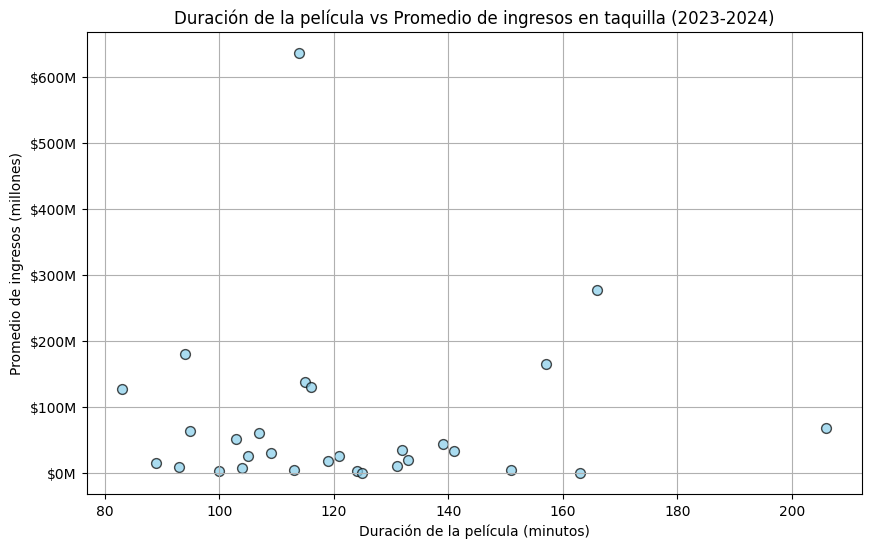

In [29]:
# Pipeline de agregación para calcular el promedio de ingresos en taquilla por duración de película
pipeline = [
    {"$match": {
        "movieTime": {
            "$regex": r'\d+h \d+m' # Documentos con formato válido
        },
        "movieYear": {
            "$in": ["2023", "2024"] # Películas del 2023 y 2024
        },
        "faq.usBoxOffice": { # Ingresos en taquilla mayores a 0
            "$gt": 0
        }
    }},
    # Proyectamos solo el campo 'movieTime' y 'usBoxOffice'
    {"$project": {
        "_id": 0,
        "movieTime": 1,
        "usBoxOffice": "$faq.usBoxOffice"
    }},
    # Conversión 'movieTime' a minutos
    {"$addFields": {
        "duration": {
            "$sum": [
                {"$multiply": [{"$toInt": {"$arrayElemAt": [{"$split": ["$movieTime", "h"]}, 0]}}, 60]},
                {"$toInt": {"$arrayElemAt": [{"$split": [{"$arrayElemAt": [{"$split": ["$movieTime", " "]}, 1]}, "m"]}, 0]}}
            ]
        }
    }},
    # Agrupación por duración y calculo del promedio y la frecuencia
    {"$group": {
        "_id": "$duration",
        "frequency": {
            "$sum": 1
        },
        "total_box_office": {
            "$sum": "$usBoxOffice"
        },
        "average_box_office": {
            "$avg": "$usBoxOffice"
        }
    }},
    # Proyectamos el resultado final
    {"$project": {
        "_id": 0,
        "duration": "$_id",
        "frequency": 1,
        "total_box_office": 1,
        "average_box_office": 1
    }},
    # Orden por duración
    {"$sort": {"duration": 1}}
]

# Ejecutamos el pipeline de agregación
result = movie_basic_data.aggregate(pipeline)

# Convertimos el resultado a un DataFrame 
df_duration_box_office = pd.DataFrame(list(result))

# Redondeamos los valores de ingreso total y promedio en taquilla para mejorar la legibilidad
df_duration_box_office['total_box_office'] = df_duration_box_office['total_box_office'] / 1e6  # Conversión a millones
df_duration_box_office['average_box_office'] = df_duration_box_office['average_box_office'] / 1e6  # Conversión a millones

# Creamos el gráfico de dispersión
plt.figure(figsize=(10, 6))
plt.scatter(df_duration_box_office['duration'], df_duration_box_office['average_box_office'], color='skyblue', edgecolor='black', alpha=0.7, s=50)
plt.xlabel('Duración de la película (minutos)')
plt.ylabel('Promedio de ingresos (millones)')
plt.title('Duración de la película vs Promedio de ingresos en taquilla (2023-2024)')
plt.grid(True)

# Formateamos el eje y para mostrar los valores en millones de manera más legible
formatter = plt.FuncFormatter(lambda x, pos: f'${int(x)}M')
plt.gca().yaxis.set_major_formatter(formatter)

plt.show()

El promedio de ingresos en taquilla varía para diferentes duraciones de películas. Algunas duraciones parecen correlacionarse con promedios de ingresos más altos, mientas que otras tienen promedio más bajos. La mayoría de las películas tienen ingresos promedio en taquilla relativamente bajos, independientemente de su duración. 

Hay algunas películas con duración más larga (más de 150 minutos), que tienen ingresos mucho más altos, destacándose como *outliers*. 

Por lo tanto, parece que no hay una relación lineal clara entre la duración y el promedio de ingresos en taquilla para las películas con fecha de estreno en 2023 y 2024. Esto sugiere que otros factores que ya hemos estudiado, como el género, u otros como el elenco, la trama y la comercialización, también puede influir en el éxito en taquilla de una película. 

---

## Calificación promedio por clasificación de película

Prosiguiendo con otras variables, nos interesa ver cuáles son las clasificaciones que son más votadas y cuál es el promedio de calificación que reciben. Para esto, consideraremos la variable dentro del campo 'faq', `rating`. 

Las clasificaciones que se usan en Hollywood son:
- 'G': audiencias generales
- 'PG': guía parental sugerida, algo del contenido puede no ser apropiado para infancias
- 'PG-13': advertencia a padres, parte del contenido no se recomienda para menores de 13 años
- 'R': jóvenes menores de 17 requieren de acompañamiento de algún adulto
- 'NC-17': Ningún menor de 17 años es admitido, contenido solo para adultos

Sin embargo, en nuestro Dataset, algunas películas se clasificaron como:
- 'TV-14': similar a 'PG-13', pero para programas de televisión, donde no se recomienda parte del contenido a menores de 14 años
- 'TV-MA': audiencias maduras solamente, equivalente a 'NC-17'

Primero, veamos cuántas películas tenemos de cada clasificación:

In [32]:
# Pipeline para agrupar clasificación y conteo
pipeline = [
    {"$group": {
        "_id": "$faq.rating", 
        "count": {
            "$sum": 1
        }
    }},
    {"$sort": {
        "_id": 1
    }}
]

# Ejecución del pipeline de agregación
result = movie_basic_data.aggregate(pipeline)

# Imprimir el resultado
print("Cantidad de películas por clasificación:")
for doc in result:
    print(f"Clasificación: {doc['_id']}, Cantidad: {doc['count']}")

Cantidad de películas por clasificación:
Clasificación: None, Cantidad: 26
Clasificación: PG, Cantidad: 6
Clasificación: PG-13, Cantidad: 21
Clasificación: R, Cantidad: 44
Clasificación: TV-14, Cantidad: 1
Clasificación: TV-MA, Cantidad: 2


Como podemos observar, las películas que contiene nuestro dataset no abarcan todas las clasificaciones y un gran porcentaje no ha obtenido clasificación en lo absoluto. 

No obstante, sigamos con el análisis y veamos si podemos obtener algún hallazgo. Consideraremos, también, el promedio de usuarios que califican cada película que podemos calcular del campo `movieRatingCount`.

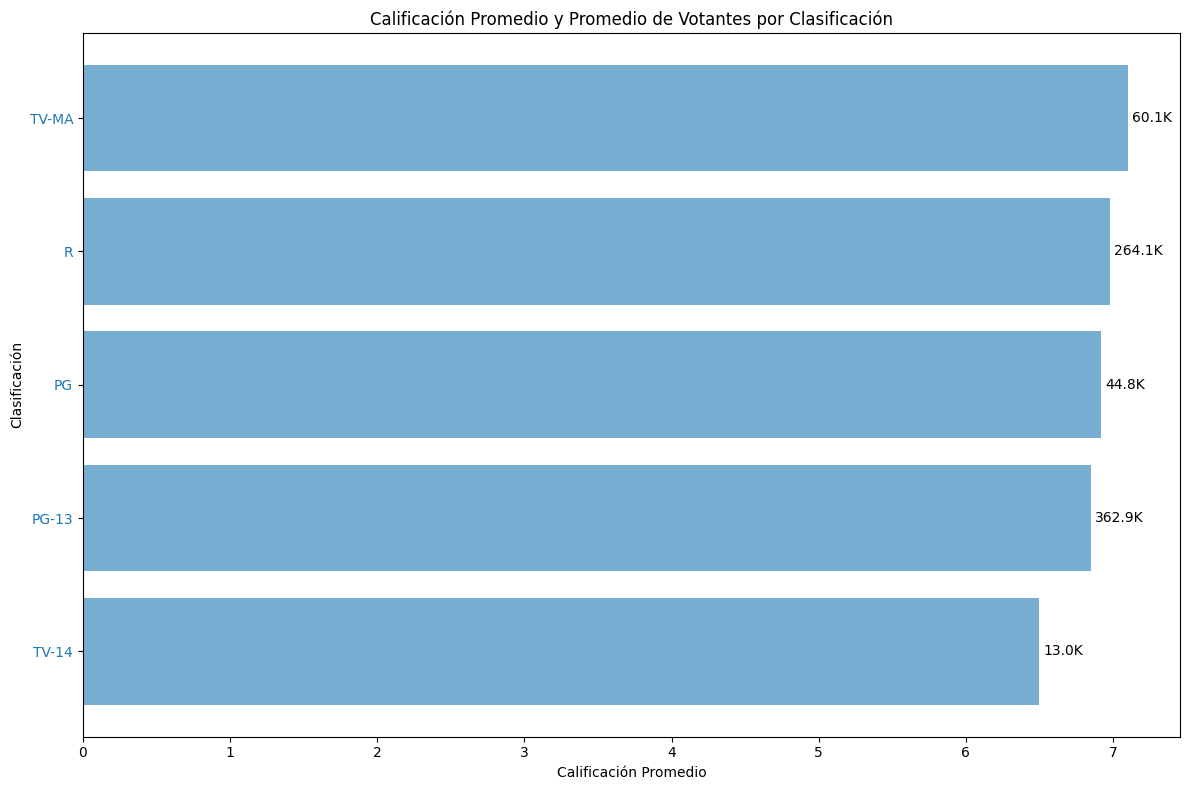

In [33]:
# Pipeline de agregación para filtrar datos de 'movieAvgRating', 'rating' y 'movieRatingCount'
pipeline = [
    {"$match": {
        "movieAvgRating": {
            "$exists": True,
            "$ne": ""
        },
        "faq.rating": {
            "$exists": True,
            "$ne": ""
        },
        "movieRatingCount": {
            "$exists": True, 
            "$ne": ""
        }
    }},
    {"$project": {
        "_id": 0,
        "movieAvgRating": {
            "$toDouble": "$movieAvgRating" # Conversión a tipo de datos numérico
        },  
        "rating": "$faq.rating",
        "movieRatingCount": {
            "$cond": {
                "if": {"$regexMatch": {"input": "$movieRatingCount", "regex": "K$"}},
                "then": {"$multiply": [{"$toDouble": {"$substr": ["$movieRatingCount", 0, {"$subtract": [{"$strLenCP": "$movieRatingCount"}, 1]}]}}, 1000]},
                "else": {
                    "$cond": {
                        "if": {"$regexMatch": {"input": "$movieRatingCount", "regex": "M$"}},
                        "then": {"$multiply": [{"$toDouble": {"$substr": ["$movieRatingCount", 0, {"$subtract": [{"$strLenCP": "$movieRatingCount"}, 1]}]}}, 1000000]},
                        "else": {"$toDouble": "$movieRatingCount"}
                    }
                }
            }
        }
    }},
    # Agrupación por rating para calcular el promedio y la frecuencia de calificación
    {"$group": {
        "_id": "$rating",
        "average_rating": {"$avg": "$movieAvgRating"},
        "average_rating_count": {"$avg": "$movieRatingCount"},
        "count": {"$sum": 1}
    }},
    # Proyectamos el resultado final
    {"$project": {
        "_id": 0,
        "rating": "$_id",
        "average_rating": 1,
        "average_rating_count": 1,
        "count": 1
    }},
    # Orden por promedio de calificación en orden descendente
    {"$sort": {"average_rating": -1}}
]

# Ejecución de pipeline 
result = movie_basic_data.aggregate(pipeline)

# Convertimos el resultado a un DataFrame 
df_avgRating_rating = pd.DataFrame(list(result))

# Orden del DataFrame por promedio de calificación en orden descendente
df_avgRating_rating = df_avgRating_rating.sort_values(by='average_rating', ascending=False)

# Configuración del gráfico
fig, ax1 = plt.subplots(figsize=(12, 8))

# Gráfico de barras horizontal para la calificación promedio
color = 'tab:blue'
ax1.set_xlabel('Calificación Promedio')
ax1.set_ylabel('Clasificación')
bars = ax1.barh(df_avgRating_rating['rating'], df_avgRating_rating['average_rating'], color=color, alpha=0.6, label='Calificación Promedio')
ax1.tick_params(axis='y', labelcolor=color)
ax1.invert_yaxis()  # Invertimos el eje Y para que las clasificaciones con mayor promedio estén arriba

# Etiquetas con el promedio de votantes al lado de cada barra
for bar, avg_rating_count in zip(bars, df_avgRating_rating['average_rating_count']):
    ax1.annotate(f'{avg_rating_count/1000:.1f}K', 
                 xy=(bar.get_width(), bar.get_y() + bar.get_height() / 2), 
                 xytext=(3, 0),  # 3 points horizontal offset
                 textcoords="offset points",
                 ha='left', va='center')

# Título y la leyenda
plt.title('Calificación Promedio y Promedio de Votantes por Clasificación')
fig.tight_layout()
plt.show()


In [35]:
df_avgRating_rating

,average_rating,average_rating_count,count,rating
0,7.100000,60100.000000,2,TV-MA
1,6.979545,264069.522727,44,R
2,6.916667,44783.666667,6,PG
3,6.847619,362933.333333,21,PG-13
4,6.500000,13000.000000,1,TV-14


Este análisis de clasificaciones de películas y sus calificaciones promedio nos revela algunos patrones interesantes:
- En primer lugar, aunque la clasificación 'TV-MA' solo cuenta con dos películas en nuestro conjunto de datos, destaca por tener la calificación promedio más alta (7.1). Dado a su equivalencia con la clasificación 'R', podríamos agrupar estas dos y sugerir que las películas para audiencias maduras tienden a ser muy bien recibidas por aqullos que las califican. 
- Asimismo, el número de votantes que vemos respecto a estas clasificaciones (264.1K en promedio para 'R') nos dice que estas películas suelen ser más populares, atrayendo a un gran número de espectadores que se toman el tiempo para calificarlas. 
- La clasificación 'PG-13', en 21 películas, también muestra una considerable cantidad de votos (362.9K en promedio) y una calificación promedio de 6.85. Esta categoría parece ser atractiva para una amplia audiencia, probablemente debido a su equilibrio entre contenido maduro y accesibilidad para un público más joven. Sin embargo, la calificación ligeramente inferior sugiere que no todas las películas dentro de esta categoría alcanzan el mismo nivel de excelencia percibida. 
- Las películas clasificadas como 'PG' tienen una calificación promedio de 6.92 y atraen a una cantidad moderada de votantes (44.8K en promedio). Este grupo, aunque menos numeroso, parece mantener un nivel de calidad constante y es apreciado por un número respetable de espectadores.
- Finalmente, la clasificación 'TV-14', representada por una sola película con una calificación promedio de 6.50 y 13 mil votos, no proporciona suficiente información para sacar conclusiones definitivas. No obstante, al ser casi equivalente a 'PG-13' podemos relacionarlas mediante su calificación promedio ya que se acercan entre ellas.

En resumen, mientras que películas clasificadas para audiencias jóvenes como 'PG' y 'PG-13', son numerosas y mantienen un nivel de calidad constante, son las películas dirigidas a audiencias mayores ('R' y 'TV-MA') las que parecen sobresalir en términos de calidad percibida. 

---

## Top 10 de películos con mayor ROI

Por último, haremos un ranking de películas destacando aquellas que tengan mayor retorno de inversión. Para esto, evaluaremos el presupuesto con el que fueron producidas (`budget`) y compararemos con lo que obtuvieron en taquilla (`usBoxOffice`). 

In [37]:
# Pipeline de agregación para calcular ROI
pipeline = [
    {"$match": {
        "movieTitle": {
            "$exists": True,
            "$ne": 0
        },
        "faq.budget": {
            "$exists": True,
            "$ne": 0
        },
        "faq.usBoxOffice": {
            "$exists": True,
            "$ne": 0
        }
    }},
    {"$project": {
        "_id": 0,
        "movieTitle": "$movieTitle",
        "budget": "$faq.budget",
        "usBoxOffice": "$faq.usBoxOffice",
        "roi": {"$divide": [{"$subtract": ["$faq.usBoxOffice", "$faq.budget"]}, "$faq.budget"]}
    }},
    {"$sort": {"roi": -1}},# Orden por ROI en orden descendente
    {"$limit": 10} # Top 10
]

# Ejecutamos el pipeline
result = list(movie_basic_data.aggregate(pipeline))

# Convertimos el resultado en un DataFrame
df_roi = pd.DataFrame(result)

df_roi

,movieTitle,budget,usBoxOffice,roi
0,Split,9000000.0,138000000.0,14.333333
1,Pulp Fiction,8000000.0,108000000.0,12.500000
2,X,1000000.0,11800000.0,10.800000
3,Alien,11000000.0,81900000.0,6.445455
4,Barbie,100000000.0,636000000.0,5.360000
5,Deadpool,58000000.0,363000000.0,5.258621
6,Glass,20000000.0,111000000.0,4.550000
7,Top Gun: Maverick,170000000.0,719000000.0,3.229412
8,Anyone But You,25000000.0,88300000.0,2.532000
9,Titanic,200000000.0,674000000.0,2.370000


Estos resultados nos muestran, en primer lugar, que las películas con un alto ROI no necesariamente necesitan un gran presupuesto para ser exitosas. Las producciones de bajo a medio presupuesto pueden resultar extremadamente rentables si logran captar la atención del público con buenas historias y dirección. Tal es el caso de películas como '*Split*'(2016), '*Pulp Fiction*'(1994) o '*X*'(2022), que se encuentran en los primeros tres lugares del ranking.

Además, las grandes producciones y las franquicias establecidas siguen siendo inversiones seguras, siempre que puedan atraer a grandes audiencias, como lo hicieron '*Barbie*'(2023), '*Deadpool*'(2016), '*Top Gun: Maverick*'(2022) o, incluso '*Titanic*'(1997). 

---

## Conclusiones generales

Este emocionante estudio nos ha sumergido en un mundo fascinante de descubrimientos dentro de la meca del cine: Hollywood. Utilizando consultas dinámicas en una base de datos de MongoDB y la creación de visualizaciones en Python, hemos desenterrado tendencias, patrones y curiosidades que iluminan los rincones más oscuros de la industria cinematográfica.

Desde el promedio de duración de las películas hasta su desempeño en la taquilla, hemos explorado cada rincón del universo cinematográfico moderno. Hemos destapado las joyas ocultas, las 'Top 10', que han dominado las listas de popularidad, así como también hemos buceado en la diversidad de géneros y clasificaciones que moldean la experiencia cinematográfica contemporánea.

En esta odisea de análisis, hemos aprendido que el éxito de una película no se limita a una sola fórmula mágica, sino que es una sinfonía compleja de factores. La calidad percibida por la audiencia y los ingresos en la taquilla son solo la punta del iceberg. Nos hemos sumergido en el vasto océano de datos, comprendiendo que cada detalle, desde el género hasta la clasificación, juega un papel crucial en la ecuación del éxito cinematográfico.

Con cada revelación, surge un nuevo interrogante, una nueva línea de investigación. Este estudio es solo el comienzo. Nos impulsa a seguir explorando las relaciones entre las distintas variables, a ampliar nuestros horizontes y a sumar más datos a este fascinante conjunto.